<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-09-1)
 - (https://bit.ly/hg-09-2)
 - (https://bit.ly/hg-09-3)
 

# Chapter09. 텍스트를 위한 인공 신경망 ( 댓글은 분석하라!)

- 학습목표
    - 텍스트와 시계열 데이터와 같은 순차 데이터에 잘 맞는 신경망의 개념과 구성 요소에 대해 배운다
    - 케라스 API로 기본적인 순환 신경망에서 고급 순환 신경망을 만들어 영화 감상평을 분류하는 작업에 적용해 본다.
    - 순환 신경망에서 발생하는 문제점과 이를 극복하기 위한 해결책을 살펴본다.
    
    
## 09-1 순차 데이터와 순환 신경망

- 핵심 키워드
    - 순차 데이터
    - 순환 신경망
    - 셸
    - 은닉 상태
    - 순차 데이터의 특징을 알고 순환 신경망의 개념을 학습한다.
    
#### 문제 상황

상품 페이지의 수많은 댓글을 일일이 확인하기 어렵다. 설령 마케팅 팀의 모든 직원이 나눠서 확인하더라도 사람마다 댓글의 좋고 나쁨을 가르는 기준이 달라서 이또한 문제이다.


### 순차 데이터

**순차 데이터 sequential data**는 텍스트나 **시계열 데이터 time seires data** 와 같이 순서에 의미가 깅ㅆ는 데이터를 말한다. 예를 들어 "I am a boy"는 쉽게 이해 할수 있지만 "boy am a I"는 말이 되지 않는다. 또 일별 온도를 기록한 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일의 온도르르 쉽게 예상하기 어렵다.

지금까지 우리가 보았던 데이터는 순서와는 상관이 없다. 예로 패션 MNIST 데이터를 생각해보자. 이 데이터를 신경망 모델에 전달할 때 샘플을 랜덤하게 섞은 후 훈련 세트와 검증 세트로 나누었다. 즉 샘플의 순서와 전혀 상관이 없다. 심지어 골고루 섞는 편이 결과가 더 좋다.

이는 딥러닝뿐만 아니라 일반적인 머신러닝 모델에서도 마찬가지이다. 4장에서 봤던 생선 데이터나 패션 MNIST 데이터는 어떤 샘플이 먼저 주입되어도 모델의 학습에 큰 영향을 미치지 않는다.

이 장에서 사용하려는 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터이다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 한다. 단어의 순서를 마구 섞어서 주입하면 안된다.

따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들어 "별로지만 추천해요" 에서 "추천해요"가 입력될 때 "별로지만"을 기억하고 있어야 이 댓글을 무조건 긍정적이라고 판단하지 않을 것이다.

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않습니다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망 feedforward neural network FFNN**이라고 한다. 이전 장에서 배웠던 완전 연결 신경망과 합성곱 신경망이 모두 피드포워드 신경망에 속한다.

신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달되어서는 곤란하다. 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다. 이런 신경망이 바로 순환 신경망이다.

### 순환 신경망

**순환 신경망 recurrent neural network, RNN**은 일반적인 완전 연결 신경망과 거의 비슷하다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다. 

그래서 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 종종 말한다. 이렇게 샘플을 처리하는 한 단계를 **타임스텝 timestep**이라고 말한다. 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래 될수록 순환되는 정보는 희미해 진다. 나중에 여기에 대해서 다시 자세히 언급하겠다.

순환 신경망에는 특별히 층을 **셀 cell** 이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 **은닉 상태 hidden state**라고 부른다.

합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있다. 하지만 기본 구조는 같다. 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 거다. 달라지는 것은 츠으이 출력(즉 은닉 상태)을 다음 타임 스텝에 재사용한다는 것 뿐이다.

일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 hyperbolic tangent 함수인 tanh가 많이 사용된다. tanh함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. 하지만 헷갈릴 수 있으니 이 책에서는 이렇게 부르지 않겠다. tanh함수는 시그모이드 함수와는 달리 -1 ~ 1 사이의 범위를 가진다.

다른 신경망과 마찬가지로 순환 신경망 그림에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많다. 하지만 순환 신경망에서도 활성화 함수가 반드시 필요하다는 것을 꼭 기억하자.

합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일하다. 다만 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다. 셀은 입력과 이전 타입스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.


### 셀의 가중치와 입출력

순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보겠다. 복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 알 수 있다. 예를 들어 다음 그림처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정해 보자. 먼저 Wx의 크기를 구해보자. 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 Wx의 크기는 4 x 3 = 12개가 된다. 7장에서 본 완전 연결 신경망의 입력층과 은닉층의 연결과 같다. 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 Wb의 크기는 어떻게 될까?

순환층에 있는 첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째, 세 번째 뉴런에 모두 전달 된다. 위 그림에서 붉은색으로 표시했다. 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결된다.

두 번째 뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고(파란 화살표), 세 번째 뉴런의 은닉 상태도 동일하다(검은 화살표). 따라서 이 순한층에서 은닉 상태를 위한 가중치 W3는 3 x 3 = 9 개이다. 가중치는 모두 구했으니 모델 파라미터 개수를 계산해 보자. 가중치에 절편을 더하면 된다. 여기엔 각 뉴런마다 하나의 절편이 있다. 따라서 이 순환층은 모두 12 + 9 + 3 =24개의 모델 파라미터를 가지고 있다. 이제 왜 순환층을 셀 하나로 표시할 수밖에 없는지 이해가 됬을 것이다. 은닉 상태가 모든 뉴런에 순환되기 때문에 완전 연결 신경망처럼 그림으로 표현하기는 너무 어렵다.

- 모델 파라미터 수 = Wx + Wb + 절편 = 12 + 9 + 3 = 24

순환층의 가중치 크기를 알아보았으므로 이번에는 순환층의 입력과 출력에 대해 생각해 보자. 이전 장에서 배웠던 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가진다. 너비, 높이, 채널이다. 입력이 합성곱 층과 풀링 층을 통과하면 너비,높이,채널(혹은 깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지되었다.

순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스 sequence라고 말한다. 시퀀스 안에는 여러 개의 아이템이 들어 있다. 여기에서 시퀀스의 길이가 바로 타임스텝 길이가 된다.

예를 들어 어떤 샘플에 "I am a boy" 란 문장이 들어 있다고 가정해 보자. 이 샘플은 4개의 단어로 이루어져 있다. 각 단어를 3개의 어떤 숫자로 표현한다고 가정해 보자.( 이 숫자 표현에 대해서는 다음 절에 자세히 다루겠다.)

이런 입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력된다. 이를 차근차근 설명해 보겠다. 하나의 샘플은 시퀀스 길이(여기서에서는 단어 개수) 와 단어표현(다음 절에서 다룬다)의 2차원 배열이다. 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정된다. 셀이 모든 타입스텝에서 출력을 만든 것처럼 표현했다. 하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

마지막으로 출력층의 구성에 대해 알아보겠다. 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용한다. 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용한다.


### 순환 신경망으로 순환 데이터 처리 - 문제해결 과정

이번 절에서 순차 데이터와 순환 신경망을 소개했다. 먼저 순차 데이터의 특징을 예를 들어 소개했고 순환 신경망의 개념과 주요 구성 요소를 소개했다. 여기에는 순환층, 셀, 은닉 상태 등이 포함된다.

순환층은 순서를 가진 데이터를 처리하기 위해 밀집 신경망이나 합성곱 신경망과는 계산하는 방식이 다르다. 은닉층의 출력을 다음 층으로만 보내지 않고 다음 순서에 다시 재사용하는 순환 구조로 되어 있다.

하지만 거시적인 구조는 다른 신경망과 크게 다르지 않다. 입력에 가중치를 곱하고 절편을 더한 다음 활서화 함수를 통과시켜 다음 층으로 전달하는 것이다. 다만 순환층은 이전 타임스텝의 출력을 입력으로 함께 사용한다. 또 마지막 타임스텝의 출력만 다음 층으로 전달하다는 것을 잊지 말자.

다음 절에서는 템서플로와 케라스를 사용해 순차 데이터와 순환 신경망을 직접 만들어 영화 감상평을 긍정과 부정으로 분류해보겠다.

## 09-2 순환 신경망으로 IMDB 리뷰 분류하기

- 핵심키워드
    - 말뭉치
    - 토큰
    - 원-핫 인코딩
    - 단어 임베딩
    - 텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류한다.
    
1절에서 순환 신경망의 작동 원리를 살펴보았다. 이번 절에서는 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련해 보겠다.

이 데이터셋을 두 가지 방법으로 변형하여 순환 신경망에 주입해보겠다. 하나는 원-핫 인코딩 이고 또 다른 하나는 단어 임베딩이다. 이 두 가지 방법의 차이점에 대해 설명하고 순환 신경망을 만들 때 고려해야 할 점을 알아보겠다.

그럼 먼저 이 절에서 사용할 IMDB 리뷰 데이터셋을 적재해 보겠다.

### IMDB 리뷰 데이터셋

IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.

- 자연어 처리와 말뭉치란 무엇인가?
    - 자연어 처리(natural language processing, NLP)는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다. 대표적인 세부 분야로는 음성 인식, 기계번역, 감성 분석등이 있다. IMDB 리뷰를 감성평에 따라 분류하는 작업은 감성 분석에 해당한다. 자연어 처리 분야에서는 훈련 데이터를 종종 **말뭉치 corpus**라고 부른다. 예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치 이다.
    
사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. 앞서합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않는다. 이미지가 정수 픽셀값으로 이루어져 있기 때문이다. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다. 

예를들어 'he'를 10으로 매핑하고 'cat'을 13에 매핑하더라고 'cat'이 'he'보다 좋거나 크다는 뜻이 아니다. 이 정숫값 사이에는 어떤 관계도 없다. 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 **토큰 token**이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.

- 간단한 문제라면 영어 말뭉치에서 토큰을 단어와 같게 봐도 좋다. 한국어는 조금 다르다.

- 한글 문장은 어떻게 토큰을 분리하나요?
    - 한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로 부족하다. 일반적으로 한글은 형태소 분석을 통해 토큰을 만든다. KoNLPy를 참고


토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.

- 어휘 사전은 무엇인가?
    - 훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 말한다. 예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입한다.
    
실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어있다. tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보겠다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하겠다. 이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 500으로 지정한다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data ( num_words=500)

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

먼저 훈련 세트와 테스트 세트의 크기를 확인해 보겠다.

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


앞서 말했듯이 이 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000 개의 샘플로 이루어져 있다. 그런데 배열이 1차원인 게 이상하지 않나? IMDB 리뷰 텍스트는 길이가 제각각이다. 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리르 효율적으로 사용할 수 있다. 즉 앞의 그림처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배여이다.

넘파이 배열은 정수가 실수 외에도 파이썬 객체를 담을 수 있다. 그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보자.

In [3]:
print(len((train_input[0])))

218


첫 번째 리뷰의 길이는 218개의 토큰으로 이루어져 있다. 두 번째 리뷰의 길이를 확인해 보자.

In [4]:
print(len(train_input[1]))

189


몇 개 더 핼 술도 있겠지만 리뷰마다 각각 길이가 다르다. 여기서 하나의 리뷰가 하나의 샘플이 된다. 서로 다른 길이의 샘플을 어떻게 신경망에 전달하는지 잠시 후 살펴본다. 이제 첫 번째 리뷰에 담긴 내용을 출력해 보자.

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


앞서 설명했듯이 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다. 앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시 되어 나타난다.

- 어떤 기준으로 500개의 단어를 고른것인가?
    - imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택한다.

이번에는 타깃 데이터를 출력해 보자.

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 거다. 그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나누어진다. 

데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하자. 원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면 훈련 세트의 크기는 20,000개로 줄어들 것이다.

In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split (train_input, train_target, test_size=0.2, random_state=42)

이제 훈련 세트에 대해 몇 가지 조사를 해 보겠다. 먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다. 이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 재도록 하겠다.

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

lengths 배열이 준비되었으므로 넘파이 mean() 함수와 mediad() 함수를 사용해 리뷰 길이의 평균과 중간값을 구해보자.

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 편균 단어 개수는 239개이고 중간값이 178인 것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것 같다. lengths  배열을 히스토그램으로 표현해 보자.

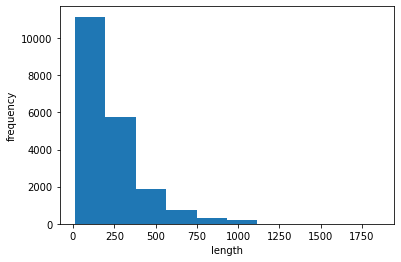

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

역시 한쪽으로 치우쳤다. 대부분의 리뷰 길이는 300 미만이다. 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다. 어떤 리뷰는 1,000개의 단어가 넘기도 한다.

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하겠다. 하지만 여전히 100개의 단어보다 작은 리뷰가 있다. 이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요하다. 보통 패딩을 나타내는 토큰으로는 0을 사용한다.

물론 수동으로 훈련 세트에 있는 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩 할 수 있다. 하지만 자주 있는 번거로운 작업에는 항상 편리한 도구가 준비되어 있다. 케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences()함수를 제공한다. 이 함수를 사용해 train_input의 길이를 100으로 맞추어 보겠다.

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

사용법은 간단하다. maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩 한다. 패딩 된  결과가 어떻게 나타나는지 확인해 보겠다. 먼저 train_seq의 크기를 확인해 보자.

In [12]:
print(train_seq.shape)

(20000, 100)


train_input은 파이썬 리스트의 배열이었지만 길이를 100으로 맞춘 train_seq는 이제 (20000, 100) 크기의 2차원 배열이 되었다. train_seq에 있는 첫 번째 샘플을 출력해 보자.

In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


이 샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것 같다. 그럼 원래 샘플의 앞부분이 잘렸을까? 뒷부분이 잘렸을까? train_input에 있는 원본 샘플의 끝을 확인해 보자.

In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


음수 인덱스와 슬라이싱을 사용해 train_input[0]에 있는 마지막 10개의 토큰을 출력했다. train_seq[0]의 출력값과 비교하면 정확히 일치한다. 그렇다면 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있겠다. 

pad_sequences()함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자른다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다. 영화 리뷰 데이터를 생각해 보면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있다. 만약 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences()함수의 truncating 매개변수의 값을 기본값 'pre'가 아닌 'post'로 바꾸면 된다.

이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보자.

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안된다. 역시 같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가된다. 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에서 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다. 하지만 원한다면 pad_sequences()함수의 padding 매개변수의 기본값인 'pre'를 'post'로 바꾸면 샘플의 뒷부분에 패딩을 추가할 수 있다.

그럼 이런 방식대로 검증 세트의 길이도 100으로 맞추어 보자.

In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

이제 훈련세트와 검증세트 준비를 마쳤다. 이제 본격적으로 순환 신경망 모델을 만들어 보자.

### 순환 신경망 만들기

케라스는 여러 종류의 순환층 클래스를 제공한다. 그중에 가장 간단한 것은 simpleRNN 클래스이다. 이 클래스는 7장 1절에서 설명한 것과 거의 비슷한 기능을 수행한다. IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴러을 가지고 시그모이드 활성화 함수를 사용해야 한다. 먼저 케라스의 Sequential 클래스 만든 신경망 코드를 살펴보자.


In [17]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


이 코드는 지금까지 보았던 구성과 매우 비슷한다. 달라진 것은 Dense나 Conv2D 클래스 대신 simpleRNN 클래스를 사용했다. 첫 번째 매개변수는 사용할 뉴런의 개수로 input_shape에 입력 차원은 (100,500)으로 지정했다. 첫 번째 차원이 100인 것은 앞에서 샘플의 길이를 100으로 지정했기 때문이다. 그럼 500은 어디서 온 숫자일까?

순환층도 당연히 활성화 함수를 사용해야 한다. simpleRNN 클래스의 actication 매개변수의 기본값은 'tanh'로 하이퍼볼릭 탄젠트 함수를 사용한다. 여기서는 기본값을 그대로 사용한다.

그럼 imput_shape의 두 번째 차원인 500은 어디서 온 숫자일까? 이전 섹션에서 만든 train_seq와 val_seq에는 한 가지 큰 문제가 있다. 토큰을 정수로 변환한 이 데이터를 신경망에 주힙하면 큰 정수가 큰 활성화 출력을 만들기 때문이다.

분명히 이 정수 사이에는 어떤 관련이 없다. 20번 토큰을 10번 토큰보다 더 중요시해야 할 이유가 없다. 따라서 순순한 정숫값을 신경망에 입력하기 위해서는 다른 방식을 찾아야 한다.

정숫값에 있는 크기 속성을 없애고 각 정수를 고류하게 표현하는 방법은 7장에서 잠간 보았던 원-핫 인코딩이다. 예를 들어 train_seq[0]의 첫 번째 토큰인 10을 원-핫 인코딩으로 바꾸면 다음과 같다.

- 원-핫 인코딩은 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환한다. 7장의 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해 원-핫 인코딩을 사용할 수 있다고 배웠다.

열한 번째 원소만 1이고 나머지는 모두 0인 배열이다. 이 배열의 길이는 얼마일까?

imbd.load_data(0 함수에서 500개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개이다. 즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩토큰)에서 499까지이다. 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 한다.

7장 1절에서 'I am a boy"에 있는 각 단어를 숫자 3개를 사용해 표현한다고 예를 들었던 것을 기억하나? 여기에도 개념을 동일 하다. 토큰마다 500개의 숫자를 사용해 표현하는 것이다. 다만 500개 중에 하나만 1이고 나머지 모두 0으로 만들어 정수 사이에 있던 크기 속성을 없애는 원-핫 인코딩을 사용한다.

혹시 예상했을 수 있겠지만 케라스에는 이미 원-핫 인코딩을 위한 유틸리티를 제공한다. 따라서 수동으로 위와 같은 배열을 만들 필요가 없다. 이 유틸리는 바로 keras.utils 패키지 아래에 있는 to_categorical()함수이다. 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해 준다.

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

먼저 train_seq를 원-핫 인코딩으로 변환하여 train_oh 배열을 만들었다. 이 배열의 크기를 출력해 보자.

In [19]:
print(train_oh.shape)

(20000, 100, 500)


정수 하나마다 모두 500차원의 배열로 변경되었기 때문에 (20000, 100) 크기의 train_seq가(20000, 100, 500) 크기의 train_oh로 바뀌었다. 이렇게 샘플 데이터의 크기가 1차원 정수 배열(100,)에서 2차원 배열(100,500)로 바꿔야 하므로 SimpleRNN 클래스의 input_shape 매개변수의 값을 (100,500)으로 지정한 것이다.

train_oh의 첫 번째 샘플의 첫 번째 토큰이 10이 잘 인코딩되었는지 출력해보자.

In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개 원소를 출력해 보면 열한 번째 우너소가 1인 것을 확인할 수 있다. 나머지 원소는 모두 0일까? 넘파이 sum()함수로 모든 원소의 값을 더해서 1이 되는지 확인해 보자.

In [21]:
print(np.sum(train_oh[0][0]))

1.0


토큰 10이 잘 인코딩 되었다. 열한 번째 원소만 1이고 나머지 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 되었다. 같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어 놓겠다.

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

이제 훈련에 사용할 훈련 세트와 검증 세트가 모두 준비되었다. 앞서 만든 모델의 구조를 출력해 보자.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


SimplrRNN에 전달할 샘플의 크기는 (100,500) 이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다. 이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8이믈 확인 할 수 있다.

순환층에 사용된 모델 파라미터의 개수를 계산해보자. 입력 토큰은 500차원의 원-핫 인코딩 배열이다. 이 배열의 순환층의 뉴런 8개와 완전히 연결 되기때문에 총 500 x 8 = 4,000개의 가중치가 있다. 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다.이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8 (은닉 상태 크기) x 8(뉴런개수) = 64개의 가중치가 필요하다. 마지막으로 뉴런마다 하나의 절편이 있다. 따라서 모두 4,000 + 64 + 8 = 4,072개의 모델 파라미터가 필요하다.

케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다. 이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없다. Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꾸어 주었다. 다음 섹션에서 이 순환 신경망 모델을 훈련해 보자.

### 순환 신경망 훈련하기

순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않다. 모델을 만드는 것은 달라도 훈련하는 방법은 모두 같다. 이것이 케라스 API를 사용하는 장점이다. 다음 코드처럼 모델을 컴파일 하고 훈련하는 전체 구조가 동일하다.

이 예에서는 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하였다. 그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했다. 그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일하다.

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                   validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 12s 606us/sample - loss: 0.6978 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5118
Epoch 2/100
20000/20000 [==============================] - 11s 571us/sample - loss: 0.6930 - acc: 0.5159 - val_loss: 0.6905 - val_acc: 0.5294
Epoch 3/100
20000/20000 [==============================] - 12s 584us/sample - loss: 0.6861 - acc: 0.5529 - val_loss: 0.6777 - val_acc: 0.5860
Epoch 4/100
20000/20000 [==============================] - 12s 591us/sample - loss: 0.6702 - acc: 0.6071 - val_loss: 0.6614 - val_acc: 0.6304
Epoch 5/100
20000/20000 [==============================] - 12s 583us/sample - loss: 0.6554 - acc: 0.6391 - val_loss: 0.6476 - val_acc: 0.6548
Epoch 6/100
20000/20000 [==============================] - 12s 610us/sample - loss: 0.6399 - acc: 0.6643 - val_loss: 0.6366 - val_acc: 0.6646
Epoch 7/100
20000/20000 [==============================] - 12s 601us/sample - loss: 0.6246 - acc: 0

이 훈련은 서른다섯 번째 에코크에서 조기 종료되었다. 검증 세트에 대한 정확도는 약 80% 정도이다. 매우 뛰어난 성능은 아니지만 감상평을 분류하는 데 어느 정도 성과를 내고 있다고 판단할 수 있다.

그럼 이전 장에서처럼 훈련 손실을 그래프로 그려서 훈련 과정을 살펴보겠다.

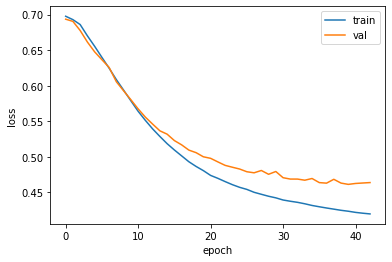

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 스무 번째 에포크에서 가소가 둔해지고 있다. 적절한 에포크에서 훈련을 멈춘 것 같다. 1절에서 배원 순환 신경망을 성공적으로 훈련시켜서 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업을 수행했다.

여기서 한 가지 생각할 점이 있다. 이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환했다. 원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것이다. 실제로 train_seq 배열과 train_oh 배열의 nbytes 속성을 출력하여 크기를 확인해 보자.

In [30]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


토큰 1개를 500차원으로 늘렸기 때문에 대략 500배가 커진다. 이는 썩 좋은 방법은 아닌 것 같다. 훈련 데이터가 커질수록 더 문제가 될 것이다. 다음 섹션에서 순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보도록 하자.

### 단어 임베딩을 사용하기

순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 **단어 임베딩 word embedding**이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다. 

이런 단어 임베딩으로 만들어진 벡터는  원-핫 인코딩 된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다. 물론 이런 당어 임베딩 벡터를 만드는 층은 이미 준비되어 있다. 케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다. 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다. 즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용 할 수 있다. 이 때문에 메모리를 훨씬 효율적으로 사용할 수 있다.

앞서 원-핫 인코딩은 샘플 하나를 500차원으로 늘렸기 때문에 (100,) 크기의 샘플이 (100, 500)으로 커졌다. 이와 비슷하게 임베딩도 (100,)크기의 샘플을 (100,20)과 같이 2차원 배열로 늘린다. 하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있다.

Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보겠다.

In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기이다. 앞서 IMDB 리뷰 데이터셋에서 500개의 단어만 사용하도록 imdb.load_data(num_words=500)과 같이 설정했기 때문에 이 매개변수의 값을 500으로 지정한다.

두 번째 매개변수(16)는 임베딩 벡터의 크기이다. 여기에서는 원-핫 인코딩보다 훨씬 작은 크기(16)의 벡터를 사용했다. 세 번째 input_length 매개변수는 입력 시퀀스의 길이이다. 앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었다. 따라서 이 값을 100으로 지정한다.

그다음 SimpleRNN 층과 Dense층은 이전과 동일하다. 이 모델의 구조를 출력해 보자.

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


summary() 메서드의 출력에서 알 수 있듯이 이 모델은 (100,) 크기의 입력을 받아 (100,16) 크기의 출력을 만든다. 이 모델에서 사용되는 모델 파라미터 개수를 계산해 보자.

Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 총 500 x 16 = 8,000개의 모델 파라미터를 가진다. 그다음 SimpleRNN층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 x 8 =128 개를 가진다. 또한 은닉 상태에 곱해지는 가중치 8 x 8 = 64 개가 있다. 마지막으로 8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터의 개수는 128+64+8 = 200개 이다.

마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개이다. 원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만 임베딩 벡터는 단어를 잘 표현하는 능력이 있기 때문에 훈련 결과는 이전에 못지 않을 것이다. 모델 훈련 과정은 이전과 동일하다.

In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 4s 212us/sample - loss: 0.6968 - acc: 0.5047 - val_loss: 0.6959 - val_acc: 0.5080
Epoch 2/100
20000/20000 [==============================] - 4s 193us/sample - loss: 0.6912 - acc: 0.5278 - val_loss: 0.6932 - val_acc: 0.5118
Epoch 3/100
20000/20000 [==============================] - 4s 192us/sample - loss: 0.6865 - acc: 0.5448 - val_loss: 0.6910 - val_acc: 0.5228
Epoch 4/100
20000/20000 [==============================] - 4s 192us/sample - loss: 0.6819 - acc: 0.5671 - val_loss: 0.6892 - val_acc: 0.5362
Epoch 5/100
20000/20000 [==============================] - 4s 194us/sample - loss: 0.6771 - acc: 0.5810 - val_loss: 0.6875 - val_acc: 0.5404
Epoch 6/100
20000/20000 [==============================] - 4s 193us/sample - loss: 0.6724 - acc: 0.5921 - val_loss: 0.6858 - val_acc: 0.5460
Epoch 7/100
20000/20000 [==============================] - 4s 193us/sample - loss: 0.6674 - acc: 0.6018 -

출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다. 반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어들었다. 마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보자.

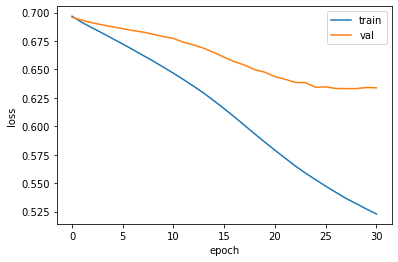

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실이 더 감소되지 않아 훈련이 적절히 조기 종료된 것 같다. 이에 비해 훈련 손실은 계속 감소한다. 이를 더 개선할 방법이 있는지 다음 절에서 알아보자.

### 케라스 API로 순환 신경망 구현 - 문제해결 과정

1절에서 배웠던 순환 신경망의 개념을 실제 모델을 만들어 보면서 구체화해 보았다. 텐서플로와 케라스는 완전 연결 신경망, 합성곱 신경망뿐만 아니라 다양한 순환층 클래스를 제공하기 때문에 손쉽게 순환 신경망을 만들 수 있다.

이 절에서는 순환 신경망의 MNIST 데이터셋으로 생각할 수 있는 유명한 IMDB 리뷰 데이터셋을 사용했다. 이 작업은 리뷰의 감성평을 긍정과 부정으로 분류하는 이진 분류 작업이다.

두 가지 모델을 훈련해 보았다. 먼저 입력 데이터를 원-핫 인코딩으로 변환하여 순환층에 직접 주입하는 방법을 사용했다. 두 번째는 정수 시퀀스를 그대로 사용하기 위해 모델 처음에 Embedding 층을 추가했다. 단어 임베딩은 단어마다 실수로 이루어진 밀집 벡터를 학습하기 때문에 단어를 풍부하게 표현할 수 있다.

다음 절에서는 더 복잡한 문제에 적용할 수있는 고급 순환층을 배우고 같은 문제에 적용하여 결과를 비교해 보겠다.


## 09-3 LSTM과 GRU셀

- 핵심 키워드
    - LSTM
    - 셀 상태
    - GRU
    - 순환 신경망에서 빼놓을 수 없는 핵심 기술인 LSTM과 GRU 셀을 사용한 모델을 만들어 본다.
    
이 절에서는 고급 순환층인 LSTM과 GRU에 대해 알아보겠다. 이런 층들은 2절에서 배웠던 SimpleRNN보다 계산이 훨씬 복잡하다. 하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택되고 있다.

일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다. 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문이다. 따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려 울 수 있다. 이를 위해 LSTM과 GRU 셀이 발명되었다.

### LSTM 구조

LSTM은 Long Short - Term Memory의 약자이다. 말 그대로 단기 기억을 오래 기억하기 위해 고안되었다. LSTM은 구조가 복잡하므로 단계적으로 설명하겠다. 하지만 기본 개념을 동일하다. LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있다. 이런 계산 결과는 다음 타임스텝에 재사용된다.

먼저 은닉 상태를 만드는 방법을 알아보자. 은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활설화 함수를 통과시켜 다음 은닉 상태를 만든다. 이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용한다. 또 tanh활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다.

LSTM에는 순환되는 상태가 2개이다. 은닉 상태 말고 **셀 상태 cell state**라고 부르는 값이 또 있다. 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM셀에서 순환만 되는 값이다.

- LSTM에는 총 4개의 셀이 있다.

### LSTM 신경망 훈련하기

먼저 이전 절에서 처럼 IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나눈다.

In [40]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input ,train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)


/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


그다음 케라스의 pad_sequences()함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가한다.

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

이제 LSTM 셀을 사용한 순환층을 만들어 보겠다. 사실 SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 된다.

In [43]:
from tensorflow import keras


model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2절에서 임베딩을 사용했던 순환 신경망 모델과 완전히 동일하다. 여기에서는 SimpleRNN 대신 LSTM을 사용한다. 모델 구조를 출력해 보자.

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


SimpleRNN 클래스의 모델 파라미터 개수는 200개였다. LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4개가 늘어 모델 파라미터 개수는 800개가 되었다.

모델을 컴파일하고 훈련해 보겠다. 이전과 마찬가지로 배치 크기는 64개, 에포크 횟수는 100으로 지정한다. 체크포인트와 조기 종료를 위한 코드도 동일하다.

In [45]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 15s 762us/sample - loss: 0.6920 - acc: 0.5495 - val_loss: 0.6908 - val_acc: 0.5838
Epoch 2/100
20000/20000 [==============================] - 15s 737us/sample - loss: 0.6887 - acc: 0.6159 - val_loss: 0.6861 - val_acc: 0.6248
Epoch 3/100
20000/20000 [==============================] - 15s 745us/sample - loss: 0.6803 - acc: 0.6566 - val_loss: 0.6732 - val_acc: 0.6650
Epoch 4/100
20000/20000 [==============================] - 15s 751us/sample - loss: 0.6462 - acc: 0.6938 - val_loss: 0.6086 - val_acc: 0.7254
Epoch 5/100
20000/20000 [==============================] - 16s 801us/sample - loss: 0.5776 - acc: 0.7407 - val_loss: 0.5657 - val_acc: 0.7370
Epoch 6/100
20000/20000 [==============================] - 15s 742us/sample - loss: 0.5467 - acc: 0.7551 - val_loss: 0.5397 - val_acc: 0.7566
Epoch 7/100
20000/20000 [==============================] - 15s 745us/sample - loss: 0.5218 - acc: 0

20000/20000 [==============================] - 15s 733us/sample - loss: 0.3939 - acc: 0.8238 - val_loss: 0.4282 - val_acc: 0.8052
Epoch 59/100
20000/20000 [==============================] - 14s 719us/sample - loss: 0.3932 - acc: 0.8237 - val_loss: 0.4288 - val_acc: 0.8048
Epoch 60/100
20000/20000 [==============================] - 15s 729us/sample - loss: 0.3924 - acc: 0.8252 - val_loss: 0.4288 - val_acc: 0.8036


훈련과 손실과 검증 손실 그래프를 그려보겠다.

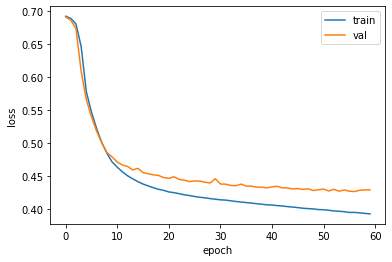

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

그래프를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수항한 것으로 보인다. 하지만 경우에 따라서는 과대적합을 더 강하게 제어할 필요가 있다. 7장에서 배웠던 드롭아웃을 순환층에도 적용할 수 있을까? 다음 섹션에서 이에 대해 알아보자.

### 순환층에 드롭아웃 적용하기

완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했다. 이를 통해 모델이 훈련 세트나 너무 과대적합되는 것을 막았다. 순환층은 자체적으로 드롭아웃 기능을 제공한다. SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다.

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다. 하지만 기술적인 문제로 인해 recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못한다. 이 대문에 모델의 훈련 속도가 크게 느려진다. 따라서 여기에서는 dropout만을 사용해 보겠다.

전체적인 모델 구조는 이전과 동일하다. LSTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 입력을 드롭아웃 한다.


In [48]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

이 모델을 이전과 동일한 조건으로 훈련해 보자.

In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 17s 862us/sample - loss: 0.6927 - acc: 0.5268 - val_loss: 0.6920 - val_acc: 0.5760
Epoch 2/100
20000/20000 [==============================] - 17s 831us/sample - loss: 0.6914 - acc: 0.5692 - val_loss: 0.6906 - val_acc: 0.6054
Epoch 3/100
20000/20000 [==============================] - 17s 833us/sample - loss: 0.6893 - acc: 0.5975 - val_loss: 0.6881 - val_acc: 0.6128
Epoch 4/100
20000/20000 [==============================] - 17s 840us/sample - loss: 0.6856 - acc: 0.6142 - val_loss: 0.6837 - val_acc: 0.6218
Epoch 5/100
20000/20000 [==============================] - 17s 834us/sample - loss: 0.6791 - acc: 0.6312 - val_loss: 0.6758 - val_acc: 0.6362
Epoch 6/100
20000/20000 [==============================] - 16s 817us/sample - loss: 0.6671 - acc: 0.6486 - val_loss: 0.6594 - val_acc: 0.6544
Epoch 7/100
20000/20000 [==============================] - 16s 817us/sample - loss: 0.6392 - acc: 0

검증 손실이 약간 향상된것 같다. 훈련 손실 그래프를 그려보자.

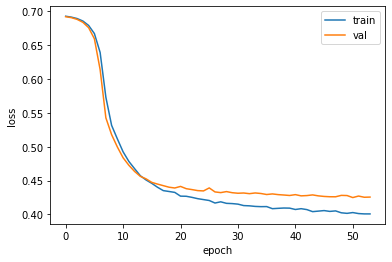

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

네,LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다. 훈련 손실과 검증 손실 같의 차이가 좁혀진 것을 확인 할수 있었다.

밀집층이나 합성곱 층처럼 순환층도 여러개를 쌓지 않을 이유가 없다. 다음 섹션에서 2개의 순환층을 연결한 모델을 훈련해 보자.

### 2개의 층을 연결하기

순환층을 연결할 때는 한 가지 주의할 점이 있다. 앞서 언급했지만 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다. 하지만 순환층을 쌓게 되면 모든 순환층에 순차데이처가 필요하다. 따라서 앞쪽의 순환층이 모든 타입스텝에 대한 은닉 상태를 출력해야 한다. 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다. 

케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 된다. 다음의 코드를 확인해보자.

In [51]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

2개의 LSTM층을 쌓았고 모두 드롭아웃을 0.3으로 지정했다. 그리고 첫 번째 LSTM 클래스에는 return_sequences 매개변수를 True로 지정한 것을 볼 수 있다. summary() 메서드의 결과를 확인해 보자.

In [52]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력 크기가 (None,100,8)로 표시되었다. 이에 반해 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None,8)이다.

이 모델을 앞에서와 같이 훈련해 보겠다.

In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.6929 - acc: 0.5189 - val_loss: 0.6926 - val_acc: 0.5548
Epoch 2/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.6919 - acc: 0.5577 - val_loss: 0.6911 - val_acc: 0.5898
Epoch 3/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.6891 - acc: 0.5885 - val_loss: 0.6864 - val_acc: 0.6404
Epoch 4/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.6795 - acc: 0.6200 - val_loss: 0.6682 - val_acc: 0.6848
Epoch 5/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.6427 - acc: 0.6642 - val_loss: 0.6065 - val_acc: 0.7026
Epoch 6/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.5876 - acc: 0.7107 - val_loss: 0.5579 - val_acc: 0.7248
Epoch 7/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.5530 - acc: 0.7315 - val_lo

모델이 잘 훈련된것 같다. 일반적으로 순환층을 쌓으면 성능이 높아진다. 이 예에서는 그리 큰 효과를 내지 못했다. 손실 그래프를 그려서 과대적합이 잘 제어되었는지 확인해 보자.

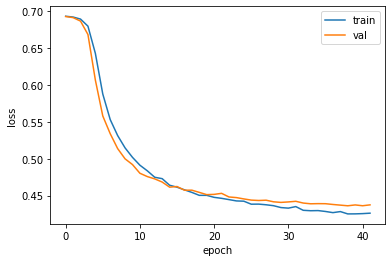

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

그래프를 보면 과대적합을 제어하면서 손실을 최대한 낮춘 것 같다. 지금까지 LSTM 셀을 사용한 훈련과 드롭아웃을 적용해 보았고 2개의 층을 쌓은 순환 신경망을 만들어보았다. 


### GRU 구조

GTU 는 Gated Recurrent Unit의 약자이다. 뉴욕 대학교 조경현 교수가 발명한 셀로 유명하다. 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다. 이셀은 LSTM 처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있다.

### GRU 신경망 훈련하기

In [55]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

LSTM 클래스를 GRU 클래스로 바뀐 것 외에는 이전 모델과 동일하다. 이 모델의 구조를 확인해 보자.

In [56]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 600       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
_________________________________________________________________


GRU 층의 모델 파라미터 개수를 계산해 보겠다. GRU 셀에는 3개의 작은 셀이 있다. 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다. 입력에 곱하는 가중치는 16 x 8 = 128개 이고 은닉 상태에 곱하는 가중치는 8 x 8 = 64개이다. 그리고 절편은 뉴런마다 하나씩이므로 8개이다. 모두 더하면 128 + 64 + 8 = 200개 이다. 이런 작은 셀이 3개이므로 모두 600개의 모델 파라미터가 필요하다. 그런데 summary()메서드의 출력은 624개이다. 무엇이 잘못 되었을까?

사실 텐서플로에 기본적으로 구현된 GRU 셀의 계산은 앞의 그림과 조금 다르다. GRU 셀의 초기 버전은 다음 그림과 같이 계산된다.

작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해진다. 따라서 GRU층의 총 모델 파라미터 개수는 624개가 된다.

텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서이다. GRU셀을 사용한 순환 신경망을 훈련해 보자. 역시 훈련 방법은 이전과 동일하다.

In [57]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 14s 699us/sample - loss: 0.6929 - acc: 0.5164 - val_loss: 0.6927 - val_acc: 0.5260
Epoch 2/100
20000/20000 [==============================] - 13s 627us/sample - loss: 0.6917 - acc: 0.5559 - val_loss: 0.6914 - val_acc: 0.5498
Epoch 3/100
20000/20000 [==============================] - 13s 625us/sample - loss: 0.6900 - acc: 0.5796 - val_loss: 0.6896 - val_acc: 0.5648
Epoch 4/100
20000/20000 [==============================] - 12s 612us/sample - loss: 0.6874 - acc: 0.5936 - val_loss: 0.6866 - val_acc: 0.5848
Epoch 5/100
20000/20000 [==============================] - 12s 621us/sample - loss: 0.6833 - acc: 0.6105 - val_loss: 0.6821 - val_acc: 0.5950
Epoch 6/100
20000/20000 [==============================] - 12s 620us/sample - loss: 0.6771 - acc: 0.6212 - val_loss: 0.6754 - val_acc: 0.6052
Epoch 7/100
20000/20000 [==============================] - 13s 634us/sample - loss: 0.6680 - acc: 0

출력 결과에서 볼 수 있듯이 LSTM과 거의 비슷한 성능을 낸다. 이 모델의 손실을 그래프로 그려보자.

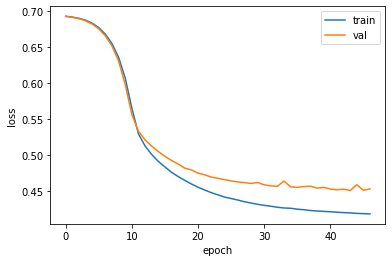

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실 차이가 있지만 훈련 과정이 잘 수렴되고 있는 것을 확인할 수 있다. 순환 신경망에서 가장 인기 있는 LSTM와 GRU셀을 사용해 성공적으로 훈련 시켰다.

- 출처: 혼자 공부하는 머신러닝 + 딥러닝